## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP (AUG21)
### GRIP@THE SPARKS FOUNDATION
### TASK1-  Predicting the percentage of an student based on the no. of study hours.
### Author: Sunil Kumar Singh

### Prediction using Supervised ML (Level- Beginner)
#### Objective : 
- Predict the percentage of an student based on the no. of study hours.
- What will be predicted score if a student studies for 9.25 hrs/day?

## Importing all the required libraries to furnish the task

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
# Reading the data from the url itself
url = "http://bit.ly/w-data"
Study_df = pd.read_csv(url)
print(Study_df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [38]:
# Looking for the head of the dataframe, here we can see 5 top data from the dataframe.
Study_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [39]:
# Looking for the tail of the dataframe,here we can see last 5 data from the dataframe.
Study_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [40]:
# Let's look for the shape of dataframe
Study_df.shape

(25, 2)

-  As we can see above, we have 25 rows and 2 columns in the dataframe.` 

In [41]:
# Lets look for the info of the data frame
Study_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [42]:
# Let's look for the summary of the dataframe with the help of describe() function.
Study_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


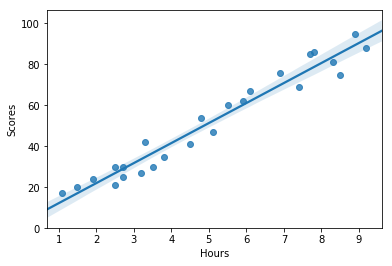

In [43]:
# Visualise the data with the help of sns.regplot() function,regplot is equal to regression plot.
# Plot between hours & scores
import seaborn as sns
sns.regplot(x='Hours',y='Scores',data=Study_df)

- We can see linear relationship in the variables

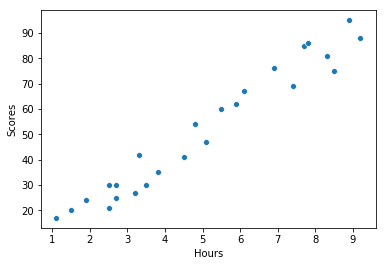

In [44]:
sns.scatterplot(data=Study_df,x='Hours',y='Scores')

- As we can see from above graph (regplot & scatterplot), variables are highly correlated with each other.

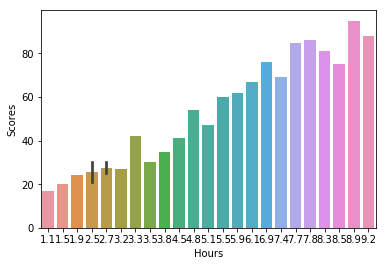

In [45]:
# Creating the bar plot between Hours & Scores
sns.barplot(data=Study_df,x='Hours',y='Scores')

As we can see, With the help of bar plot, if you study for longer hours, you will score more.

In [46]:
# Let's look for the correlation of the dataframe
Study_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


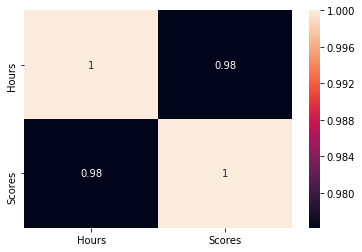

In [47]:
sns.heatmap(Study_df.corr(),annot=True)

both variables are highly correlated.

#### Let's clean the data and handle if any missing value is present in the dataframe.



In [48]:
Study_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see from the above, that we dont have any missing or null value in the datafram. 

### Splitting the Dataframe
So here we can perform this task with the below mentioned libraries.
- Statsmodels 
- Sklearn
- will be using Sklearn for this problem. 

#### Steps:
- Create X and y
- Split data into train and test(70-30 or 80-20)
- Train model on training set
- Evaluate the model (Training & test set)

In [49]:
# Create X and Y
X = Study_df['Hours']
y = Study_df['Scores']

In [50]:
# train-test split
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=100)
X_train.shape

(20,)

In [52]:
X_train.head()

19    7.4
23    6.9
21    4.8
6     9.2
12    4.5
Name: Hours, dtype: float64

In [53]:
y_test.head()

9     25
22    35
13    42
11    62
5     20
Name: Scores, dtype: int64

So here whole data got divided into train and test with the ratio of 80:20

In [54]:
# Now training the model,Create an object of linear regression
from sklearn.linear_model import LinearRegression

# Create an object of linear regression
lm = LinearRegression()

In [55]:
# reshape X_train to (n,1)
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [56]:
# Fit the model
lm.fit(X_train_lm,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# Look for the parameters, make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)

[9.83544438]
1.9894231109746912


In [58]:
# Now make predictions on the train & test data
#y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)
y_train_pred = lm.predict(X_train_lm)

In [59]:
y_test_pred

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [60]:
y_train_pred

array([74.77171154, 69.85398935, 49.19955615, 92.47551143, 46.24892283,
       36.41347845, 78.7058893 , 26.57803407, 52.15018946, 28.54512294,
       12.80841193, 20.67676744, 61.98563385, 33.46284514, 77.72234486,
       26.57803407, 89.52487812, 56.08436722, 85.59070036, 83.62361149])

In [61]:
# Evaluating the Model,r-squared,on the test
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.9050356232459791

In [62]:
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)

In [63]:
r2

0.9519568836485192

-  So here we can see r squared value for test data is 90% and for train data is 95% which is very high.
-  That means hours and scores directly proprotional to each other.
-  if you study for more hours you will score more.

In [64]:
# Lest calculate mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

20.641456931253995

### What will be predicted score if a student studies for 9.25 hrs/day?

In [67]:
score = lm.predict([[9.25]])
score

array([92.96728365])

## So here is our conclusion from the dataframe, if the student is study for 9.25 hrs/day, he/she can score 92.96%.

# Thank you.